# Latent Dirichlet Allocation (LDA): An Ilustrative Example

- author: Tao Wang
- I refer to following online resources:
  - [Topic Modeling in Python: Latent Dirichlet Allocation (LDA)](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjKnJr92s3zAhUhpnIEHQ7iBicQFnoECA4QAQ&url=https%3A%2F%2Ftowardsdatascience.com%2Fend-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0&usg=AOvVaw3BOumfnMly0lUh3pfEHrWd)
  -[Topic Modeling with Gensim (Python) - Machine Learning Plus](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjKnJr92s3zAhUhpnIEHQ7iBicQFnoECAIQAQ&url=https%3A%2F%2Fwww.machinelearningplus.com%2Fnlp%2Ftopic-modeling-gensim-python%2F&usg=AOvVaw09WN-93Y-Jk0fbq3KWF7qF)
  - [Topic modeling visualization – How to present the results of LDA models?](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/)
  

In [1]:
import time

start_code = time.time()

In [2]:
Fast = True
Prange = True

## Data importing

In [3]:
import pandas as pd

In [38]:
## Here, we use a sub-sample of NYT articles containing key words "inflation" as an example 
## it is saved as a pickle file (a handy and light-weighted data format in python) 
## the path and name

file_name = '../data/article_data.pkl'

article_data = pd.read_pickle(file_name)

In [5]:
## an example of the article 
## the second article in the database and the first 1000 words in the article
## only print part of the article to save the space 
article_data.iloc[2]['text'][:1000]

" WASHINGTON -- President Trump, who has spent months assailing the Federal Reserve for its interest rate policies, said he planned to nominate Christopher Waller, a longtime regional Fed official, and Judy Shelton, a Fed critic, to serve on the central bank's seven-member board.\nThe president announced his intentions on Tuesday evening in a series of tweets. Mr. Waller, the executive vice president at the Federal Reserve Bank of St. Louis, is a far more conventional pick than Mr. Trump's earlier Fed choices of Herman Cain and Stephen Moore.\nMr. Cain, a former presidential candidate, and Mr. Moore, a conservative economist, were outspoken pundits with strong political views. Both men -- whose past actions and views toward women elicited strong criticism -- withdrew from consideration after congressional opposition made it clear that neither would win Senate confirmation.\nMs. Shelton is a former Trump campaign adviser and transition team member who has been an outspoken advocate for 

## Text Preprocessing 

We will perform the following steps:

- __Tokenization__: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
- Words that have fewer than 2 characters are removed.
- All __stopwords__ are removed.
- Words are __lemmatized__ — words in third person are changed to first person and verbs in past and future tenses are changed into present.
- Words are __stemmed__ — words are reduced to their root form.

# I did not have gensim package installed. 
# so the following code is used to install it
# comment it out once it is run once 

In [6]:
import re
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
#import nltk.stem as stemmer
import numpy as np
import nltk
import matplotlib.pyplot as plt
#nltk.download('wordnet')

In [7]:
from wordcloud import WordCloud

## stemming and lemmatizing

- Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. 
- Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

In [8]:
## write a function to lemmatize and stem the words 

def remove_email(text):
    return [re.sub('\S*@\S*\s?', '', email) for email in text]

def lemmatize_stemming(word):
    stemmer = SnowballStemmer("english")
    return WordNetLemmatizer().lemmatize(stemmer.stem(word))

## also remove stop words
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>=2:
            result.append(lemmatize_stemming(token))  
    return result

In [9]:
## apply above functions to an example article 

random_article = np.random.randint(0,1000)

one_article = article_data.iloc[random_article]['text']

print('original document: ')
print(one_article)

print('splitted into words: ')
one_artile = remove_email(one_article)
tokens = gensim.utils.simple_preprocess(one_article)
#words = []
#for word in one_article.split():
#    words.append(word)
print(tokens[:100])
print('\n\n tokenized and lemmatized document: ')
words_processed = preprocess(one_article)
print(words_processed[:200])

original document: 
 President Trump likes to brag about the supposedly booming economy. So do other Republican politicians. Some journalists have gotten into the habit too, exaggerating the strength of the economic expansion, because it makes for a good story.
Here's the truth: There is no boom. The economy has been mired in an extended funk since the financial crisis ended in 2010. G.D.P. growth still has not reached 3 percent in any year, and 3 percent isn't a very high bar.
Last week, while attending an economics conference in Washington, I discovered one particularly clear sign of the economy's struggles -- namely, that it keeps performing worse than the experts have predicted. I put together this chart to show the trend:
Again and again, Federal Reserve officials have overestimated how quickly the economy would grow. They keep having to revise their forecasts downward, only to discover that they didn't go far enough down. Economists on Wall Street and other parts of the private s

### Generate a wordcloud for an example article

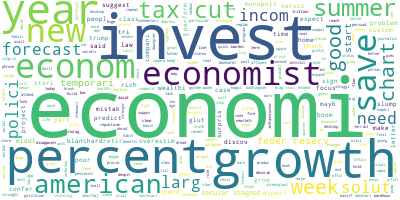

In [10]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", 
                      max_words=500, 
                      contour_width=3, 
                      contour_color='steelblue')
# Generate a word cloud
long_string=(" ").join(words_processed)  
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [11]:
## process all articles



start_process = time.time()

all_tokens = {}  # empty dictionary to save
id_map = {} ## map the id in the dataset to the id in the matrix (some articles are empty
id_count = -1  


if Prange:
    from numba import prange
    for i in prange(len(article_data)):
        #print(i)
        this_article = article_data['text'].iloc[i]
        if type(this_article)==str:
            #print('article '+str(i) + ' works')
            processed_docs = preprocess(this_article)
            all_tokens[i] = processed_docs
            #print(processed_docs[:10])
            id_count+=1
            id_map[i]=id_count 
            #print(id_count)

else:
    for i in range(len(article_data)):
        #print(i)
        this_article = article_data['text'].iloc[i]
        if type(this_article)==str:
            #print('article '+str(i) + ' works')
            processed_docs = preprocess(this_article)
            all_tokens[i] = processed_docs
            #print(processed_docs[:10])
            id_count+=1
            id_map[i]=id_count 
            #print(id_count)

all_tokens_list = [all_tokens[i] for i in all_tokens.keys()]

end_process = time.time()

In [12]:
print('Here are an example of the preprocessed words from a particular article')

print(all_tokens_list[10])

Here are an example of the preprocessed words from a particular article
['tehran', 'tehran', 'beat', 'motorcycl', 'cheap', 'fast', 'break', 'law', 'gridlock', 'traffic', 'motorcycl', 'pul', 'citi', 'million', 'nuisanc', 'necessari', 'tri', 'cultiv', 'special', 'relationship', 'motorcycl', 'mechan', 'tehran', 'talk', 'listen', 'farzad', 'motorcycl', 'mechan', 'work', 'hole', 'wall', 'garag', 'neighborhood', 'complain', 'price', 'engin', 'oil', 'tripl', 'late', 'custom', 'think', 'rip', 'said', 'tell', 'bazaar', 'buy', 'oil', 'want', 'll', 'chang', 'visit', 'erbil', 'iraqi', 'kurdistan', 'bought', 'pair', 'hike', 'shoe', 'eye', 'shone', 'gave', 'shoe', 'pair', 'bought', 'iran', 'cost', 'equival', 'month', 'wage', 'labor', 'thursday', 'morn', 'iran', 'shot', 'american', 'surveil', 'drone', 'american', 'claim', 'drone', 'intern', 'airspac', 'iranian', 'releas', 'compet', 'coordin', 'place', 'iranian', 'territori', 'thursday', 'night', 'presid', 'trump', 'approv', 'retaliatori', 'strike', '

## Bag of Words on the Dataset

Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.


In [13]:
from gensim.models import Phrases
bigram = Phrases(all_tokens_list, min_count=20)

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
for idx in range(len(all_tokens_list)):
    for token in bigram[all_tokens_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            all_tokens_list[idx].append(token)

In [14]:
## get the dictionary over all articles

dictionary = gensim.corpora.Dictionary(all_tokens_list)

## filter extreme values 
nb_doc = len(all_tokens_list)

no_below =int(0.01*nb_doc)
no_above =int(0.8*nb_doc)

dictionary.filter_extremes(no_below = no_below,
                          no_above = no_above)

In [15]:
## print some words from the dictionary 



print('The length of the dictionary: '+str(len(dictionary)))
print('Here are some words from the dictionary:')
count = 0
for x in dictionary.values():
    count=count + 1
    if count <=20:
        print(x)
    

The length of the dictionary: 4941
Here are some words from the dictionary:
act
actual
affect
age
agenc
ago
agre
ahead
aim
albeit
american
amid
appeal
ask
associ
assum
assumpt
averag
avoid
balanc


In [16]:
print("the corpus is essentially a frequency count of the present temrs in each article")

the corpus is essentially a frequency count of the present temrs in each article


In [17]:
## generate a bag of words for each article 
## i.e. count the frequency of each word in the dictionary in each article 
corpus = [dictionary.doc2bow(i) for i in all_tokens_list]

## Initialize LDA model



- The corpus or the document-term matrix to be passed to the model (in our example is called tokens_matrix)
- Number of Topics: num_topics is the number of topics we want to extract from the corpus.
- id2word: It is the mapping from word indices to words. Each of the words has an index that is present in the dictionary.
- Number of Iterations: it is represented by Passes in Python. Another technical word for iterations is ‘epochs’. Passes control how often we want to train the model on the entire corpus for convergence.
- Chunksize: It is the number of documents to be used in each training chunk. The chunksize controls how many documents can be processed at one time in the training algorithm.
   - Alpha: is the document-topic density
   - Beta: (In Python, this parameter is called ‘eta’): is the topic word density
 
    - For instance, the higher values of alpha —> the documents will be composed of more topics, and
    - The lower values of alpha —> returns documents with fewer topics.

In [18]:
import time 

start_lda = time.time()

Lda = gensim.models.ldamodel.LdaModel
LdaM = gensim.models.ldamulticore.LdaMulticore


nb_topics = 3

if Fast:
    ldamodel = LdaM(corpus,
                   num_topics= nb_topics,
                   id2word=dictionary,
                   chunksize = 100,
                   alpha='asymmetric', ## or 'symmetric'
                   eta='auto',
                   iterations = 200,
                   passes=1,
                   random_state=2019,
                   eval_every=None)
    
else:
    ldamodel = Lda(corpus,
                   num_topics= nb_topics,
                   id2word=dictionary,
                   chunksize = 100,
                   alpha='auto', ## or 'symmetric'
                   eta='auto',
                   iterations = 200,
                   passes= 1,
                   random_state=2019,
                   eval_every=None)
    
## save the model as an instance so that no need to retrained everytime 
ldamodel.save('./model/trained_results.model')
end_lda = time.time()

print('time taken to run the lda model: is {}'.format(str(end_lda-start_lda)))

time taken to run the lda model: is 10.446058988571167


In [19]:
## load the model from storage 

ldamodel = gensim.models.ldamodel.LdaModel.load('./model/trained_results.model')

In [20]:
print('These are the the most common words for each topic')
ldamodel.print_topics(num_words=20)

These are the the most common words for each topic


[(0,
  '0.017*"mr" + 0.013*"said" + 0.009*"year" + 0.006*"percent" + 0.006*"new" + 0.005*"econom" + 0.005*"govern" + 0.005*"time" + 0.005*"state" + 0.005*"presid" + 0.004*"like" + 0.004*"economi" + 0.004*"rate" + 0.004*"fed" + 0.004*"peopl" + 0.003*"american" + 0.003*"trump" + 0.003*"tax" + 0.003*"market" + 0.003*"unit"'),
 (1,
  '0.012*"year" + 0.011*"percent" + 0.009*"said" + 0.007*"state" + 0.006*"market" + 0.005*"mr" + 0.005*"economi" + 0.005*"rate" + 0.005*"like" + 0.005*"compani" + 0.005*"tax" + 0.005*"time" + 0.005*"stock" + 0.004*"new" + 0.004*"econom" + 0.004*"peopl" + 0.004*"inflat" + 0.004*"price" + 0.004*"american" + 0.004*"growth"'),
 (2,
  '0.014*"said" + 0.013*"percent" + 0.010*"rate" + 0.009*"year" + 0.009*"mr" + 0.009*"bank" + 0.008*"fed" + 0.007*"price" + 0.006*"market" + 0.006*"economi" + 0.006*"inflat" + 0.005*"econom" + 0.005*"state" + 0.005*"growth" + 0.005*"unit" + 0.005*"govern" + 0.004*"unit_state" + 0.004*"increas" + 0.004*"polici" + 0.004*"month"')]

### Assign topics to each article 


In [21]:
count = 0 
for i in ldamodel[corpus]:
    if count <=30:
        print('article',count,i)
    count +=1 

article 0 [(1, 0.29977214), (2, 0.69865984)]
article 1 [(1, 0.99457395)]
article 2 [(0, 0.72473997), (2, 0.2744957)]
article 3 [(0, 0.86415637), (1, 0.13545653)]
article 4 [(0, 0.09053776), (2, 0.90901357)]
article 5 [(0, 0.01662791), (1, 0.24353234), (2, 0.73983973)]
article 6 [(0, 0.20464487), (2, 0.79474133)]
article 7 [(0, 0.43726656), (2, 0.5622996)]
article 8 [(2, 0.9972859)]
article 9 [(0, 0.9993278)]
article 10 [(0, 0.74960506), (2, 0.24977586)]
article 11 [(0, 0.8495947), (2, 0.14997803)]
article 12 [(0, 0.5938357), (2, 0.40586057)]
article 13 [(2, 0.997196)]
article 14 [(2, 0.9965508)]
article 15 [(0, 0.7514727), (2, 0.24773073)]
article 16 [(2, 0.9972193)]
article 17 [(2, 0.99811465)]
article 18 [(0, 0.30202454), (1, 0.6975846)]
article 19 [(2, 0.9988112)]
article 20 [(2, 0.99699026)]
article 21 [(0, 0.7525523), (2, 0.24695699)]
article 22 [(2, 0.9970529)]
article 23 [(0, 0.01808124), (1, 0.05679223), (2, 0.92512655)]
article 24 [(0, 0.60007817), (1, 0.39948913)]
article 25 

- For instance, article 1 has the highest weight (0.8411557) on the second topic 

### Assign topics to each article and creating article-weight matrix

In [22]:
print('nb of articles in the sample: '+str(len(article_data)))
print('nb of articles with non-empty topic model results: '+str(len(ldamodel[corpus])))
print('\n\n')

count = 0 
for i in ldamodel[corpus]:
    if count <=30:
        print('article',count,i)
    count +=1 

nb of articles in the sample: 5271
nb of articles with non-empty topic model results: 4991



article 0 [(1, 0.29977173), (2, 0.6986603)]
article 1 [(1, 0.9945165)]
article 2 [(0, 0.7247402), (2, 0.27449545)]
article 3 [(0, 0.864143), (1, 0.13546987)]
article 4 [(0, 0.09051702), (2, 0.90903425)]
article 5 [(0, 0.016503569), (1, 0.24365754), (2, 0.7398389)]
article 6 [(0, 0.20464747), (2, 0.79473877)]
article 7 [(0, 0.43722534), (2, 0.56234086)]
article 8 [(2, 0.9972861)]
article 9 [(0, 0.9993275)]
article 10 [(0, 0.7496066), (2, 0.2497743)]
article 11 [(0, 0.84959424), (2, 0.1499785)]
article 12 [(0, 0.59383506), (2, 0.40586123)]
article 13 [(2, 0.9971966)]
article 14 [(2, 0.9965502)]
article 15 [(0, 0.7514717), (2, 0.2477317)]
article 16 [(2, 0.9972198)]
article 17 [(2, 0.9981154)]
article 18 [(0, 0.30202848), (1, 0.6975807)]
article 19 [(2, 0.9988116)]
article 20 [(2, 0.99699056)]
article 21 [(0, 0.75255406), (2, 0.24695519)]
article 22 [(2, 0.99705696)]
article 23 [(0, 0.0173159), (

In [23]:
article_weight_dict = {}

for count, topic_weight in enumerate(ldamodel[corpus]):
    #print(count)
    #print(topic_weight)
    this_article_weight = dict(topic_weight)
    #print(this_article_weight)
    article_weight_dict.update({count:this_article_weight})

In [24]:
## convert it to a dataframe 
article_weight = pd.DataFrame.from_dict(article_weight_dict,orient='index')
article_weight = article_weight.fillna(0.0)

In [25]:
## each article and its topic weight

article_weight

,1,2,0
0,0.299771,0.698661,0.000000
1,0.994520,0.000000,0.000000
3,0.135344,0.000000,0.864268
5,0.242973,0.739850,0.017177
18,0.697585,0.000000,0.302024
...,...,...,...
4966,0.000000,0.000000,0.999158
4969,0.000000,0.000000,0.996108
4971,0.000000,0.000000,0.997603
4978,0.000000,0.000000,0.999038


In [26]:
## representative article 

## rep article

rep_article_dict = {}
rep_article_text_dict = {}

for i in range(nb_topics):
    ## article id
    rep_id = article_weight[i].argmax()
    rep_article_dict.update({i:rep_id})
    
    ## articlde text
    rep_text = article_data['text'].iloc[rep_id]
    rep_article_text_dict.update({i:rep_text})
    
rep_article = pd.DataFrame.from_dict(rep_article_dict,
                                     orient='index',
                                    columns=['article_id'])

rep_article_text = pd.DataFrame.from_dict(rep_article_text_dict,
                                     orient='index',
                                    columns=['article_text'])

rep_article = pd.merge(rep_article,
                      rep_article_text,
                      left_index =True,
                      right_index=True)

rep_article

,article_id,article_text
0,4828,Wall Street overcame concerns about Greece's ...
1,1327,Canny stock investors are like judges in a qu...
2,3323,"ALMATY, Kazakhstan -- Talks between Iran an..."


## Visualization of the topic models 


In [27]:
## uncomment the code below if there is no pyLDAvis installed 
#pip install pyLDAvis

In [28]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [29]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(ldamodel, corpus, dictionary=ldamodel.id2word)
pyLDAvis.save_html(vis, '../figure/first_run.html')   ## save it as a html file 
vis   ## show the figure 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.030010 -0.007783       1        1  36.341705
0      0.025491 -0.012814       2        1  33.299574
1      0.004519  0.020597       3        1  30.358721, topic_info=           Term          Freq         Total Category  logprob  loglift
583          mr  29331.000000  29331.000000  Default  30.0000  30.0000
20         bank  13727.000000  13727.000000  Default  29.0000  29.0000
100         fed  13976.000000  13976.000000  Default  28.0000  28.0000
770       incom   5052.000000   5052.000000  Default  27.0000  27.0000
200       price  12741.000000  12741.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
583          mr   4593.688456  29331.641566   Topic3  -5.2276  -0.6619
271        unit   3033.483562  10951.627458   Topic3  -5.6426  -0.0917
115      govern   3075.298044  12312.567150   Topic3  -5.6289  -0.1951
272  unit_state   2901.167167   9832.573255   Topic3  -5.6872  -0.0285
20         bank   3043.609130  13727.432908   Topic3  -5.6392  -0.3143

[270 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
10        1  0.306880  american
10        2  0.344755  american
10        3  0.348427  american
1617      1  0.090664       art
1617      2  0.799578       art
...     ...       ...       ...
290       2  0.293501      year
290       3  0.364986      year
2665      1  0.771138      zone
2665      2  0.114434      zone
2665      3  0.114434      zone

[581 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

In [30]:
end_code = time.time()

## Topic intensity over time

In [31]:
## in the main dataset, we add columns sized of nb of topics, recording the score of each topic of that article 

for nb in range(nb_topics):
    
    ## for a particular topic 
    weight_dict = {}
    
    for i in range(len(article_data)):
        if i in id_map.keys():
            this_id = id_map[i]  ## id_map maps id in the dataset and in the model 
            weight_list = dict(ldamodel[corpus][this_id])
            
            
            if nb in weight_list:
                #article_data['weight_topic'+str(nb)].iloc[i] = weight_list[nb]
                weight_dict[i] = weight_list[nb]
            else:
                #article_data['weight_topic'+str(nb)].iloc[i] = 0.0
                weight_dict[i] = 0.0
                
    # merge this back to main data
    weight_df = pd.DataFrame(list(weight_dict.items()),
                             columns = ['id','weight_topic'+str(nb)])
    weight_df.set_index('id', drop = True, inplace = True)
    article_data = pd.merge(article_data,
                           weight_df,
                           left_index = True,
                           right_index = True,
                           how='outer')

In [32]:
## the columns on the right are newly added 

article_data.head(5)

,author,text,subject,location,company,people,organization,title,doctype,date,weight_topic0,weight_topic1,weight_topic2
0,"Irwin, Neil","American borrowing costs keep plunging, and t...",Unemployment; Economic conditions; Interest r...,NaN,NaN,NaN,Name: New York Stock Exchange--NYSE; NAICS: 5...,"Rates Keep Falling, Befuddling the Experts",News,2019-07-05,0.000000,0.299770,0.698660
1,NaN,Raise a glass to the longest economic expansi...,Executive compensation; Unemployment; Economi...,United States--US,NaN,NaN,NaN,Two Cheers for a Lackluster Economy,"Opinions, Editorial",2019-07-03,0.000000,0.994620,0.000000
2,"Smialek, Jeanna","WASHINGTON -- President Trump, who has spent ...",Nominations; Interest rates; Central banks; F...,United States--US China Japan,NaN,"Trump, Donald J Bullard, James Waller, Christ...","Name: Brookings Institution; NAICS: 541711, 5...",Trump Picks Fed Veteran And Fed Critic for Board,News,2019-07-03,0.724742,0.000000,0.274495
3,"Friedman, Thomas L",Near the close of last Wednesday's Democratic...,Life expectancy; Political parties; Geopoliti...,United States--US,NaN,NaN,NaN,The Biggest Threat to America Is Us,"Commentary, Opinions",2019-07-03,0.864188,0.135402,0.000000
4,"Sanger, David E",WASHINGTON -- Iran on Monday violated a key p...,Agreements; Violations; Nuclear fuels; Diplom...,Iran United States--US,NaN,"Trump, Donald J Pompeo, Mike Zarif, Mohammed ...",Name: Department of Defense; NAICS: 928110; N...,Iran Breaches Nuclear Limit Set in '15 Deal,News,2019-07-02,0.090503,0.000000,0.909038


In [33]:
## set date 
article_data['date'] = pd.to_datetime(article_data['date'],
                                      errors='coerce')

In [34]:
import datetime as dt 
article_data['month_date'] = pd.to_datetime(article_data['date']).dt.to_period('M')

Text(0.5, 1.0, 'Average Topic Intensity over time (7-day moving average)')

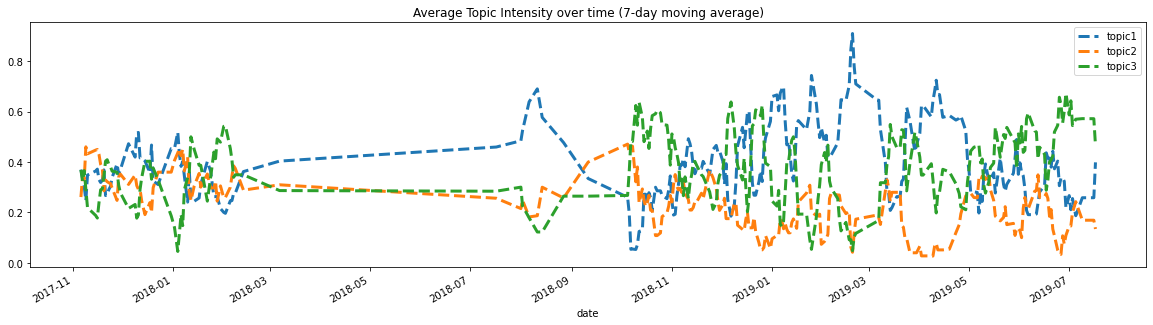

In [35]:
## day by day 
fig = plt.figure(figsize=(20,5))
for nb in range(nb_topics):
    intensity = article_data.groupby(['date'])['weight_topic'+str(nb)].mean()
    intensity_mv = intensity.rolling(7).mean()
    intensity_mv.plot(lw=3,
                   style='--',
                   label='topic'+str(nb+1))
plt.legend(loc=0)
plt.title('Average Topic Intensity over time (7-day moving average)')
## notice in this data, the dates are very sparse, hence daily plot may not be very meaningful 

Text(0.5, 1.0, 'Average Topic Intensity over time (monthly)')

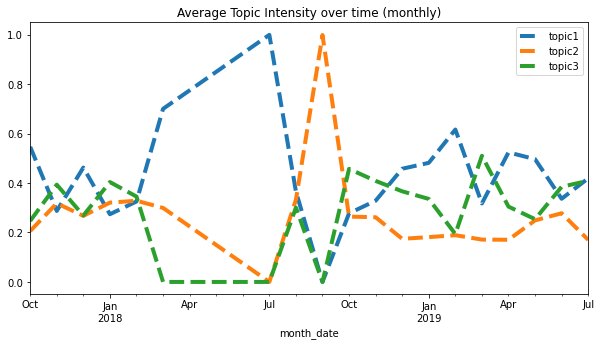

In [36]:
## month by month 

fig = plt.figure(figsize=(10,5))
for nb in range(nb_topics):
    intensity = article_data.groupby(['month_date'])['weight_topic'+str(nb)].mean()
    #intensity = intensity/intensity[0]
    intensity.plot(lw=4,
                   style='--',
                  label='topic'+str(nb+1))
    #plt.plot(intensity,
    #         lw = 2,
    #         label='topic'+str(nb+1))
plt.legend(loc=0)
plt.title('Average Topic Intensity over time (monthly)')

## Run time

In [37]:
print('time taken to process the text: is {}'.format(str(end_process-start_process)))
print('time taken to train the lda model: is {}'.format(str(end_lda-start_lda)))
print('time taken to run all code : is {}'.format(str(end_code-start_code)))

time taken to process the text: is 50.75799298286438
time taken to train the lda model: is 10.446058988571167
time taken to run all code : is 98.05576586723328
